In [266]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import seaborn as sns
import statsmodels.graphics.api as smg

#Probing data

In [267]:
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

In [268]:
datasets = [train_set,test_set]

In [269]:
train_set.name = 'train'
test_set.name = 'test'

In [270]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [271]:
test_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [272]:
train_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [273]:
test_set.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

drop features in both **datasets**

In [274]:
for dt in datasets:
  dt.drop(['Cabin','Name','Ticket'],axis=1,inplace=True)

In [275]:
train_set['PassengerId'].duplicated().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Sex survived count')

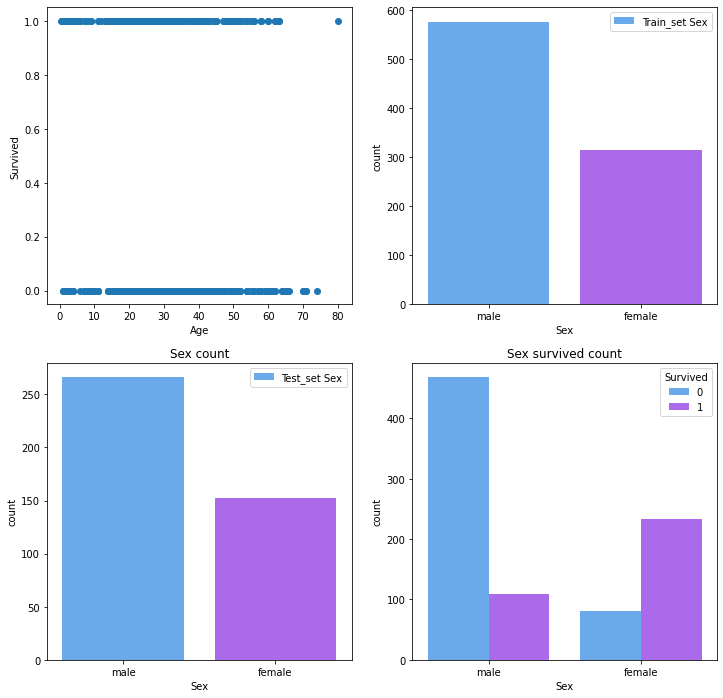

In [276]:
#Exploring some ideias

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.scatter(train_set['Age'],train_set['Survived'])
plt.ylabel('Survived')
plt.xlabel('Age')
plt.subplot(2,2,2)
sns.countplot(train_set['Sex'],label = 'Train_set Sex',palette='cool')
plt.legend()
plt.subplot(2,2,3)
sns.countplot(test_set['Sex'],label = 'Test_set Sex',palette='cool')
plt.title('Sex count')
plt.legend()
plt.subplot(2,2,4)
sns.countplot(data= train_set,x='Sex', hue = 'Survived',palette='cool')
plt.title('Sex survived count')

Replace categorical value "Sex" and "Embarked"

In [277]:
for dt in datasets:
  dt['Sex'].replace('female',1,inplace=True)
  dt['Sex'].replace('male',0,inplace=True)

In [278]:
for dt in datasets:
  dt['Embarked'].replace('S',0,inplace=True)
  dt['Embarked'].replace('C',1,inplace=True)
  dt['Embarked'].replace('Q',2,inplace=True)

In [279]:
train_set.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0.0
1,2,1,1,1,38.0,1,0,71.2833,1.0
2,3,1,3,1,26.0,0,0,7.9250,0.0
3,4,1,1,1,35.0,1,0,53.1000,0.0
4,5,0,3,0,35.0,0,0,8.0500,0.0


In [280]:
test_set.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,2
1,893,3,1,47.0,1,0,7.0000,0
2,894,2,0,62.0,0,0,9.6875,2
3,895,3,0,27.0,0,0,8.6625,0
4,896,3,1,22.0,1,1,12.2875,0


#Correlation

In [281]:
cor = train_set.corr()

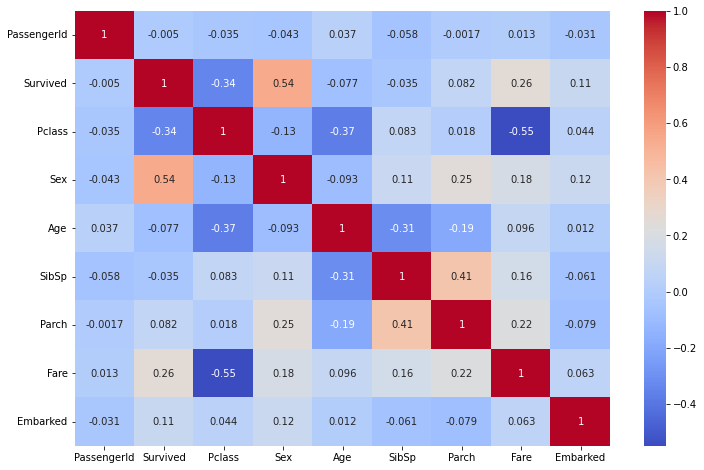

In [282]:
plt.figure(figsize=(12,8))
sns.heatmap(cor,annot=True,cmap='coolwarm')

- The survived correlation is greater with Sex, Class and Fare
- Age is correlated with Class and SibSp

**Age has a lot of NaN values**, so I'll fill with the class median since there
are correlation between both

In [283]:
cor2 = test_set.corr()

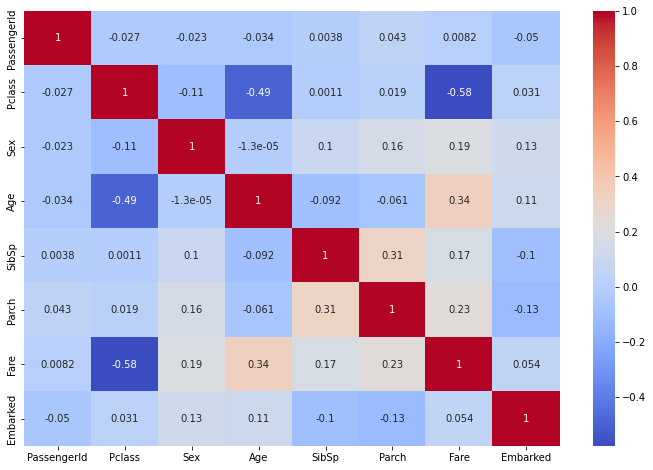

In [284]:
plt.figure(figsize=(12,8))
sns.heatmap(cor2,annot=True,cmap='coolwarm')

Age and class has a correlation slight higher than train_set

--- Setting age

In [285]:
train_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

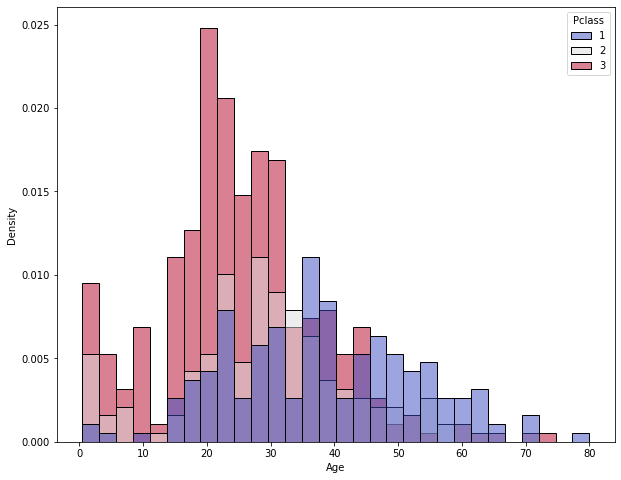

In [286]:
plt.figure(figsize=(10,8))
sns.histplot(data=train_set, x = 'Age', hue = 'Pclass', palette='coolwarm', bins=30, stat= 'density')

In [287]:
#Store median values
mdian = {}
for dt in datasets:
  key = f'{dt.name}'
  values=[]
  for n in range(1,4):
    values.append(dt['Age'].loc[dt['Pclass']==n].median())
  mdian[key] = values

In [288]:
#Set NaN age as median (of specific class)
for dt in datasets:  
  for n in range(1,4):
    dt.loc[(dt['Age'].isnull()) & (dt['Pclass']==n), 'Age'] = mdian[dt.name][n-1]

In [289]:
#Setting family relationship
for dt in datasets:
  dt['family'] = 0
  dt['family'].loc[(dt['Parch']>=1) | (dt['SibSp']>=1)]=1
  

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


**Sex**

Testing the ratio Male/Female in each dataset

In [290]:
train_set.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
family         0
dtype: int64

**Embarked**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


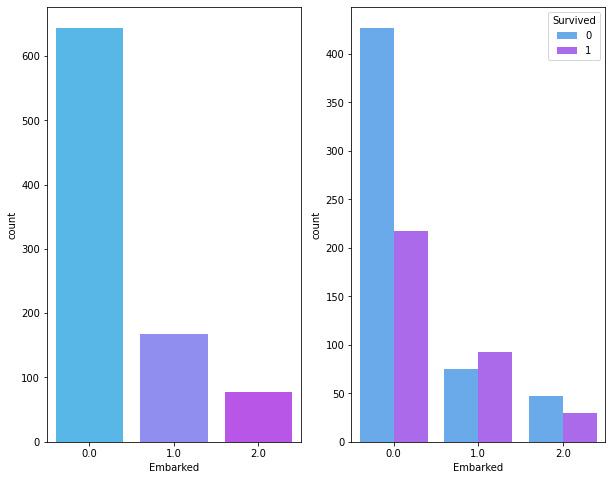

In [291]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.countplot(train_set['Embarked'], palette = 'cool')
plt.subplot(1,2,2)
sns.countplot(data = train_set, x = 'Embarked', hue = 'Survived', palette = 'cool',)


embarked in "1" have greater survival ratio

In [292]:
train_set['Embarked'].fillna(0)

0      0.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
886    0.0
887    0.0
888    0.0
889    1.0
890    2.0
Name: Embarked, Length: 891, dtype: float64

In [293]:
for dt in datasets:
  print(dt['Embarked'].isnull().sum())

2
0


In [294]:
train_set.loc[train_set['Embarked'].isnull(),'Embarked'] = 0

**FARE**

(array([0.02915775, 0.00574844, 0.00173146, 0.00041555, 0.00027703,
        0.00027703, 0.        , 0.        , 0.00020777, 0.00020777]),
 array([  0. ,  26.3,  52.6,  78.9, 105.2, 131.5, 157.8, 184.1, 210.4,
        236.7, 263. ]),
 <a list of 1 Patch objects>)

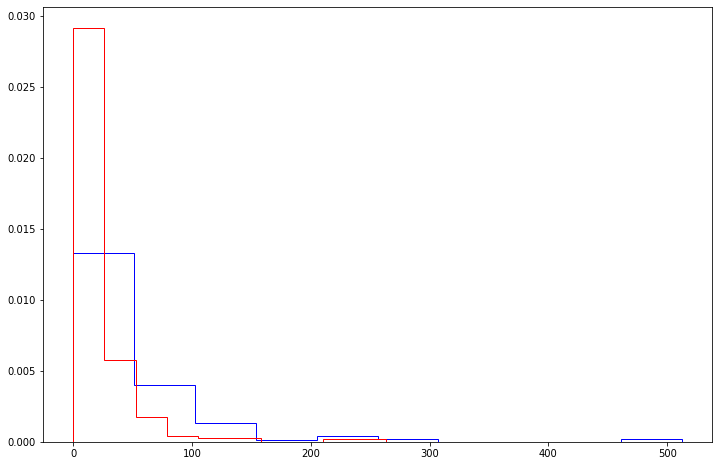

In [295]:
plt.figure(figsize=(12,8))
plt.hist(train_set['Fare'].loc[train_set['Survived']==1],histtype='step',color='blue',density=True)
plt.hist(train_set['Fare'].loc[train_set['Survived']==0],histtype='step',color='red',density=True)

In [296]:
test_set.query('Fare.isnull()',engine='python')

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family
152,1044,3,0,60.5,0,0,NaN,0,0


The NaN value is of a passenger of Pclasse ==3. Therefore a will replace it for the median of class 3

In [297]:
#Setting fare as the median of ones Pclass
md_fare = test_set['Fare'].loc[test_set['Pclass']==3].median()
md_fare

7.8958

In [298]:
test_set['Fare'].loc[test_set['PassengerId'].isin([1044])] = md_fare;

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


adding a new coloumn

In [299]:
for dt in datasets:
  #Adult
  dt['age_class'] = 1
  #Child
  dt['age_class'].loc[(dt['Age']<=14)] = 0
  #Elderly
dt['age_class'].loc[(dt['Age']>=60)] = 2

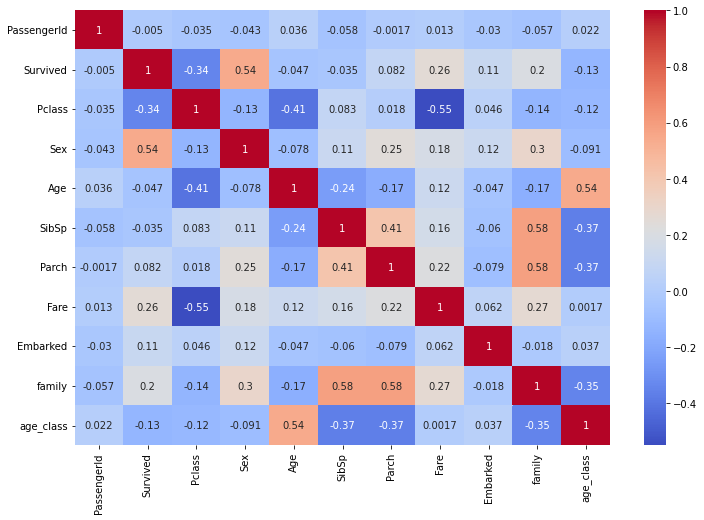

In [300]:
cor = train_set.corr()
plt.figure(figsize=(12,8))
sns.heatmap(cor,annot=True,cmap='coolwarm')

In [301]:
train_set.head(15)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family,age_class
0,1,0,3,0,22.0,1,0,7.2500,0.0,1,1
1,2,1,1,1,38.0,1,0,71.2833,1.0,1,1
2,3,1,3,1,26.0,0,0,7.9250,0.0,0,1
3,4,1,1,1,35.0,1,0,53.1000,0.0,1,1
4,5,0,3,0,35.0,0,0,8.0500,0.0,0,1
5,6,0,3,0,24.0,0,0,8.4583,2.0,0,1
6,7,0,1,0,54.0,0,0,51.8625,0.0,0,1
7,8,0,3,0,2.0,3,1,21.0750,0.0,1,0
8,9,1,3,1,27.0,0,2,11.1333,0.0,1,1
9,10,1,2,1,14.0,1,0,30.0708,1.0,1,0


exporting data

In [302]:
train_set.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family,age_class
0,1,0,3,0,22.0,1,0,7.2500,0.0,1,1
1,2,1,1,1,38.0,1,0,71.2833,1.0,1,1
2,3,1,3,1,26.0,0,0,7.9250,0.0,0,1
3,4,1,1,1,35.0,1,0,53.1000,0.0,1,1
4,5,0,3,0,35.0,0,0,8.0500,0.0,0,1


In [303]:
test_set.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family,age_class
0,892,3,0,34.5,0,0,7.8292,2,0,1
1,893,3,1,47.0,1,0,7.0000,0,1,1
2,894,2,0,62.0,0,0,9.6875,2,0,2
3,895,3,0,27.0,0,0,8.6625,0,0,1
4,896,3,1,22.0,1,1,12.2875,0,1,1


In [304]:
cols = list(train_set.columns.values)
cols.remove('Survived')
cols.append('Survived')
cols

['PassengerId',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked',
 'family',
 'age_class',
 'Survived']

In [305]:
train_set = train_set[cols]
train_set.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family,age_class,Survived
0,1,3,0,22.0,1,0,7.2500,0.0,1,1,0
1,2,1,1,38.0,1,0,71.2833,1.0,1,1,1
2,3,3,1,26.0,0,0,7.9250,0.0,0,1,1
3,4,1,1,35.0,1,0,53.1000,0.0,1,1,1
4,5,3,0,35.0,0,0,8.0500,0.0,0,1,0


In [306]:
train_set.to_csv('train_new.csv',index=False)

In [307]:
test_set.to_csv('test_new.csv',index=False)